<a href="https://colab.research.google.com/github/tejpal123456789/End-to-End-Machine-Learning-Projects/blob/main/marriage_age_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as sns

dataset=pd.read_csv('/content/drive/MyDrive/End to end machine learning Projects/Marriage Age Prediction/age_of_marriage_data.csv')
dataset.head()

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0


Data Preprocessing

In [ ]:
data=dataset.drop(['id'],axis=1)
data.head()

,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0


Handling Missing values

In [ ]:
data.shape

(2567, 9)

In [ ]:
data.isnull().sum()

gender              29
height             118
religion           635
caste              142
mother_tongue      164
profession         330
location           155
country             16
age_of_marriage     19
dtype: int64

In [ ]:
data.value_counts()

gender  height  religion   caste            mother_tongue  profession                                 location               country  age_of_marriage
female  5'4"    Hindu       Lingayath       Kannada        Software Professional                      Bengaluru / Bangalore   India   31.0               2
        5'3"    Hindu       Balija          Telugu         Managers and Senior Executives             Bengaluru / Bangalore   India   26.0               2
male    5'11"   Sikh        Kshatriya       Punjabi        Not Specified                              Punjab                  India   30.0               2
female  5'5"    Hindu       Sindhi-Sakkhar  Sindhi         Accounting Professional (Others)           Mumbai                  India   28.0               2
male    6'4"    Hindu       Saini           Hindi          Managers and Senior Executives             Delhi                   India   29.0               1
                                                                           

Handleing missing values

In [ ]:
# categorical one

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           2538 non-null   object 
 1   height           2449 non-null   object 
 2   religion         1932 non-null   object 
 3   caste            2425 non-null   object 
 4   mother_tongue    2403 non-null   object 
 5   profession       2237 non-null   object 
 6   location         2412 non-null   object 
 7   country          2551 non-null   object 
 8   age_of_marriage  2548 non-null   float64
dtypes: float64(1), object(8)
memory usage: 180.6+ KB


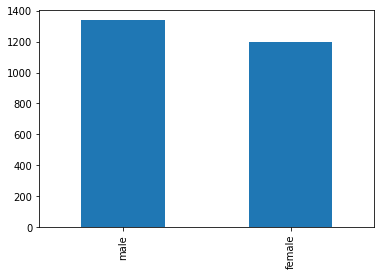

In [ ]:
data['gender'].value_counts().plot.bar()

This is the one method to fill missing values

In [ ]:

def impute_nan_mode(df,variable):
    mode=df[variable].mode()[0]
    df[variable].fillna(mode,inplace=True)

#impute_nan_value(data,'gender')
#data.head()    

In [ ]:
data.isnull().sum()

gender              29
height             118
religion           635
caste              142
mother_tongue      164
profession         330
location           155
country             16
age_of_marriage     19
dtype: int64

Now we fill the missing values with the random values of the column

In [ ]:
data.isnull().sum()

gender              29
height             118
religion           635
caste              142
mother_tongue      164
profession         330
location           155
country             16
age_of_marriage     19
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


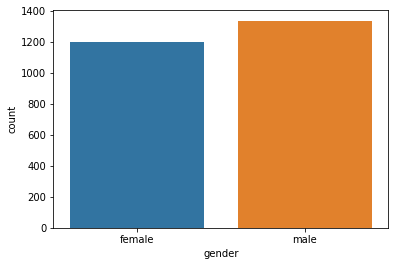

In [ ]:
import seaborn as sns
sns.countplot(data['gender'])

In [ ]:
data.head()

,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0


Now deal with Height

In [ ]:
data['height'].mode()[0]

'5\'3"'

In [ ]:
#def impute_random(df,variable):
    
 #data[variable].fillna(lambda x: random.choice(data[data[variable] != np.nan][variable]), inplace =True)
 #return data
#impute_random(data,'height') 
#data.isnull().sum()
def impute_nan(df,variable):
    
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
impute_nan(data,'height')    
data.isnull().sum()
data.head()
impute_nan(data,'gender')
data.head()

,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage,height_random,gender_random
0,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0,"5'4""",female
1,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0,"5'7""",male
2,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0,"5'7""",male
3,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0,"5'0""",female
4,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0,"5'5""",male


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


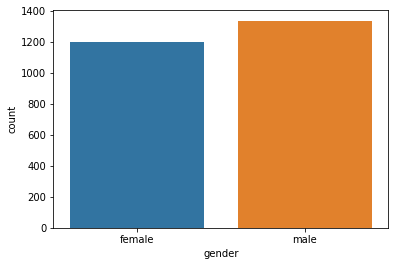

In [ ]:
data['height_random'].isnull().sum()
import seaborn as sns
sns.countplot(data['gender'])

In [ ]:
data['height_in_inches']=data['height_random'].str.split("'").str[0]
print(data['height_in_inches'].isnull().sum())
x=data['height_random'].str.split("'").str[1]
data['height_in_cms']=x.str.split('"').str[0]
data.head()

0


,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage,height_random,gender_random,height_in_inches,height_in_cms
0,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0,"5'4""",female,5,4
1,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0,"5'7""",male,5,7
2,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0,"5'7""",male,5,7
3,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0,"5'0""",female,5,0
4,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0,"5'5""",male,5,5


In [ ]:
data.isnull().sum()

gender               29
height              118
religion            635
caste               142
mother_tongue       164
profession          330
location            155
country              16
age_of_marriage      19
height_random         0
gender_random         0
height_in_inches      0
height_in_cms         0
dtype: int64

In [ ]:
data['height_in_inches']=data['height_in_inches'].astype(int)
data['height_in_cms']=data['height_in_cms'].astype(int)


data['total_height_in_cms']=(data['height_in_inches'])*30.24+data['height_in_cms']
data.head()

,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage,height_random,gender_random,height_in_inches,height_in_cms,total_height_in_cms
0,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0,"5'4""",female,5,4,155.2
1,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0,"5'7""",male,5,7,158.2
2,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0,"5'7""",male,5,7,158.2
3,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0,"5'0""",female,5,0,151.2
4,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0,"5'5""",male,5,5,156.2


In [ ]:
data.isnull().sum()

gender                  29
height                 118
religion               635
caste                  142
mother_tongue          164
profession             330
location               155
country                 16
age_of_marriage         19
height_random            0
gender_random            0
height_in_inches         0
height_in_cms            0
total_height_in_cms      0
dtype: int64

In [ ]:
data2=data.drop(['height','height_random','height_in_inches','height_in_cms'],axis=1)
data2.head()

,gender,religion,caste,mother_tongue,profession,location,country,age_of_marriage,gender_random,total_height_in_cms
0,female,NaN,others,Telugu,NaN,London,United Kingdom,21.0,female,155.2
1,male,Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0,male,158.2
2,male,Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0,male,158.2
3,female,Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0,female,151.2
4,male,Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0,male,156.2


In [ ]:
data2.isnull().sum()

gender                  29
religion               635
caste                  142
mother_tongue          164
profession             330
location               155
country                 16
age_of_marriage         19
gender_random            0
total_height_in_cms      0
dtype: int64

Dealing with caste

In [ ]:
data2['caste'].isnull().sum()
data2['caste'].value_counts()

others                   493
 Brahmin                 252
 Kshatriya                70
 Lingayath                65
 Agarwal                  53
 Shwetamber               46
 Patel                    42
 Arora                    41
 Baniya                   41
 Vaishnav                 41
 Bhandari                 41
 Gursikh                  40
 Valmiki                  40
 Kayastha                 40
 Ramdasia                 40
 Balija                   40
 Khatri                   40
 Thakur                   40
 Baishnab                 40
 Kaibarta                 40
 OBC - Barber/Naayee      40
 Sindhi-Sakkhar           40
 Rajput - Lodhi           40
 Ahom                     40
 Goud                     40
 Born Again               40
 Billava                  40
 Kalita                   40
 Saini                    40
 Bhatia                   40
 Marthoma                 40
 Memon                    40
 Arya Vysya               40
 Baidya                   40
 Sahu         

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


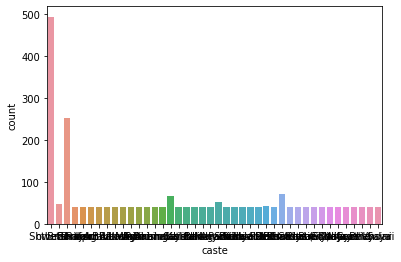

In [ ]:
import seaborn as sns
sns.countplot(data2['caste'])

In [ ]:
impute_nan(data2,'caste')
data2.isnull().sum()

gender                  29
religion               635
caste                  142
mother_tongue          164
profession             330
location               155
country                 16
age_of_marriage         19
gender_random            0
total_height_in_cms      0
caste_random             0
dtype: int64

others                   523
 Brahmin                 267
 Kshatriya                72
 Lingayath                67
 Agarwal                  58
 Shwetamber               48
 Baniya                   48
 Baishnab                 46
 Kaibarta                 45
 Thakur                   45
 Patel                    44
 Saini                    44
 OBC - Barber/Naayee      44
 Born Again               44
 Baidya                   44
 Viswabrahmin             43
 Vanniyar                 43
 Rajput - Lodhi           43
 Memon                    43
 Marthoma                 43
 Billava                  43
 Khatri                   43
 Bhandari                 42
 Valmiki                  42
 Ramdasia                 42
 Agri                     42
 Scheduled Caste (SC)     42
 Goud                     42
 Roman Catholic           42
 Arora                    42
 Gursikh                  41
 Sahu                     41
 Kalita                   41
 Sindhi-Sakkhar           41
 Bhatia       

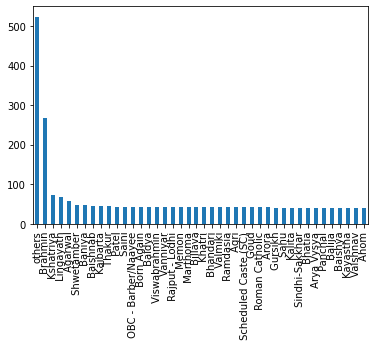

In [ ]:
data2['caste_random'].value_counts().plot.bar()
data2.caste_random.value_counts()

Dealing with religion

In [ ]:
data3=data2.drop(['caste'],axis=1)
data3.head()

,gender,religion,mother_tongue,profession,location,country,age_of_marriage,gender_random,total_height_in_cms,caste_random
0,female,NaN,Telugu,NaN,London,United Kingdom,21.0,female,155.2,others
1,male,Jain,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0,male,158.2,Shwetamber
2,male,Hindu,Hindi,Entrepreneurs / Business,Begusarai,India,32.0,male,158.2,Brahmin
3,female,Hindu,Hindi,Architect,Mumbai,India,30.0,female,151.2,Thakur
4,male,Christian,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0,male,156.2,Born Again


In [ ]:
data3.religion.isnull().sum()

635

In [ ]:
data3['religion'].value_counts()

Hindu        1576
Sikh          150
Christian     120
Jain           46
Muslim         40
Name: religion, dtype: int64

In [ ]:
impute_nan(data3,'religion')
data3.religion_random.value_counts()

Hindu        2100
Sikh          195
Christian     154
Jain           61
Muslim         57
Name: religion_random, dtype: int64

In [ ]:
data4=data3.drop(['religion'],axis=1)
data4.head()

,gender,mother_tongue,profession,location,country,age_of_marriage,gender_random,total_height_in_cms,caste_random,religion_random
0,female,Telugu,NaN,London,United Kingdom,21.0,female,155.2,others,Hindu
1,male,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0,male,158.2,Shwetamber,Jain
2,male,Hindi,Entrepreneurs / Business,Begusarai,India,32.0,male,158.2,Brahmin,Hindu
3,female,Hindi,Architect,Mumbai,India,30.0,female,151.2,Thakur,Hindu
4,male,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0,male,156.2,Born Again,Christian


Dealing with mother tongue

In [ ]:
for feature in ['mother_tongue','country']:
    print(data4[feature].isnull().sum())
    print(data4[feature].value_counts())

164
Hindi           508
Telugu          283
Bengali         249
Punjabi         233
Marathi         215
Gujarati        184
Kannada         157
Tamil           111
Assamese        107
Malayalam        97
Odia             64
Sindhi           58
Marwari          30
Tulu             29
English          24
Konkani          22
Urdu              7
Chattisgarhi      5
Haryanavi         4
Kutchi            4
Bhojpuri          4
Other             2
Manipuri          2
Aka               1
Kashmiri          1
Nepali            1
Rajasthani        1
Name: mother_tongue, dtype: int64
16
 India                   2246
 USA                      131
 Canada                    35
 United Arab Emirates      34
 United Kingdom            23
 Australia                 19
 Malaysia                  17
 Pakistan                   6
 New Zealand                6
 Kuwait                     5
 Bangladesh                 4
 Qatar                      3
 Singapore                  3
 Oman                       2

In [ ]:
impute_nan(data4,'mother_tongue')
impute_nan_mode(data4,'country')
data5=data4.drop(['mother_tongue'],axis=1)
data5.head()

,gender,profession,location,country,age_of_marriage,gender_random,total_height_in_cms,caste_random,religion_random,mother_tongue_random
0,female,NaN,London,United Kingdom,21.0,female,155.2,others,Hindu,Telugu
1,male,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0,male,158.2,Shwetamber,Jain,Gujarati
2,male,Entrepreneurs / Business,Begusarai,India,32.0,male,158.2,Brahmin,Hindu,Hindi
3,female,Architect,Mumbai,India,30.0,female,151.2,Thakur,Hindu,Hindi
4,male,Sales Professional / Marketing,Sulthan Bathery,India,30.0,male,156.2,Born Again,Christian,Malayalam


In [ ]:
data5.isnull().sum()

gender                   29
profession              330
location                155
country                   0
age_of_marriage          19
gender_random             0
total_height_in_cms       0
caste_random              0
religion_random           0
mother_tongue_random      0
dtype: int64

Dealing with profession

In [ ]:
data5['profession'].nunique()

86

In [ ]:
data5['profession'].value_counts()

Not Specified                   264
Not working                     253
Banking Professional            109
Software Professional           105
Entrepreneurs / Business         86
                               ... 
Journalist                        1
IAS / IRS / IES / IFS             1
Indian Police Services [IPS]      1
Hairstylist                       1
Landscape Architect               1
Name: profession, Length: 86, dtype: int64

In [ ]:
data5['profession'].fillna('missing',inplace=True)
data5.isnull().sum()

gender                   29
profession                0
location                155
country                   0
age_of_marriage          19
gender_random             0
total_height_in_cms       0
caste_random              0
religion_random           0
mother_tongue_random      0
dtype: int64

In [ ]:
data5['profession_after_impute']=data5['profession']
data5.head()
data5.isnull().sum()
data5.head()

,gender,profession,location,country,age_of_marriage,gender_random,total_height_in_cms,caste_random,religion_random,mother_tongue_random,profession_after_impute
0,female,missing,London,United Kingdom,21.0,female,155.2,others,Hindu,Telugu,missing
1,male,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0,male,158.2,Shwetamber,Jain,Gujarati,Doctor / Healthcare Professional
2,male,Entrepreneurs / Business,Begusarai,India,32.0,male,158.2,Brahmin,Hindu,Hindi,Entrepreneurs / Business
3,female,Architect,Mumbai,India,30.0,female,151.2,Thakur,Hindu,Hindi,Architect
4,male,Sales Professional / Marketing,Sulthan Bathery,India,30.0,male,156.2,Born Again,Christian,Malayalam,Sales Professional / Marketing


In [ ]:
data6=data5.drop(['profession'],axis=1)

profession_name=[]
for i in range(len(data6['profession_after_impute'])):
    if '/' not in data6['profession_after_impute'][i]:
        profession_name.append(data6['profession_after_impute'][i]+'/almost_same')
    else:
      profession_name.append(data6['profession_after_impute'][i])

profession_name
profession_a=pd.DataFrame({'profession_of_person':profession_name})
profession_a.head()

data7=pd.concat([data6,profession_a],axis=1)
data7.head()
data8=data7.drop(['profession_after_impute'],axis=1)
data8.head()

,gender,location,country,age_of_marriage,gender_random,total_height_in_cms,caste_random,religion_random,mother_tongue_random,profession_of_person
0,female,London,United Kingdom,21.0,female,155.2,others,Hindu,Telugu,missing/almost_same
1,male,Fairfax- VA,USA,32.0,male,158.2,Shwetamber,Jain,Gujarati,Doctor / Healthcare Professional
2,male,Begusarai,India,32.0,male,158.2,Brahmin,Hindu,Hindi,Entrepreneurs / Business
3,female,Mumbai,India,30.0,female,151.2,Thakur,Hindu,Hindi,Architect/almost_same
4,male,Sulthan Bathery,India,30.0,male,156.2,Born Again,Christian,Malayalam,Sales Professional / Marketing


In [ ]:
data8['person_by_profession']=data8['profession_of_person'].str.split('/').str[0]
data9=data8.drop(['profession_of_person'],axis=1)
data9.head()

,gender,location,country,age_of_marriage,gender_random,total_height_in_cms,caste_random,religion_random,mother_tongue_random,person_by_profession
0,female,London,United Kingdom,21.0,female,155.2,others,Hindu,Telugu,missing
1,male,Fairfax- VA,USA,32.0,male,158.2,Shwetamber,Jain,Gujarati,Doctor
2,male,Begusarai,India,32.0,male,158.2,Brahmin,Hindu,Hindi,Entrepreneurs
3,female,Mumbai,India,30.0,female,151.2,Thakur,Hindu,Hindi,Architect
4,male,Sulthan Bathery,India,30.0,male,156.2,Born Again,Christian,Malayalam,Sales Professional


Dealing with location

In [ ]:
data9['location'].isnull().sum()
data9['location'].nunique()
data9['location'].value_counts()





Mumbai                   213
Bengaluru / Bangalore    169
Delhi                    140
Hyderabad                100
Pune                      90
                        ... 
Rockville- MD              1
Darwin                     1
Mandi                      1
Kannur                     1
Udaipur                    1
Name: location, Length: 536, dtype: int64

In [ ]:
data9['location']=data9['location'].replace('Bengaluru / Bangalore','Bengaluru')
data9['location']=data9['location'].replace('Fairfax- VA','Fairfax')
data9['location'].value_counts()
impute_nan(data9,'location')

In [ ]:
data9.head()
data9.shape

(2567, 11)

In [ ]:
data9.dropna()

,gender,location,country,age_of_marriage,gender_random,total_height_in_cms,caste_random,religion_random,mother_tongue_random,person_by_profession,location_random
0,female,London,United Kingdom,21.0,female,155.20,others,Hindu,Telugu,missing,London
1,male,Fairfax,USA,32.0,male,158.20,Shwetamber,Jain,Gujarati,Doctor,Fairfax
2,male,Begusarai,India,32.0,male,158.20,Brahmin,Hindu,Hindi,Entrepreneurs,Begusarai
3,female,Mumbai,India,30.0,female,151.20,Thakur,Hindu,Hindi,Architect,Mumbai
4,male,Sulthan Bathery,India,30.0,male,156.20,Born Again,Christian,Malayalam,Sales Professional,Sulthan Bathery
...,...,...,...,...,...,...,...,...,...,...,...
2562,female,Agra,India,27.0,female,154.20,Thakur,Hindu,Hindi,Banking Professional,Agra
2563,male,Ottawa,Canada,31.0,male,162.20,Thakur,Hindu,Hindi,Software Professional,Ottawa
2564,female,Bengaluru,India,28.0,female,154.20,Baishya,Hindu,Bengali,Software Consultant,Bengaluru
2565,female,Hyderabad,India,26.0,female,131.96,others,Hindu,Telugu,Not working,Hyderabad


In [ ]:
data10=data9.drop(['location'],axis=1)


In [ ]:
data10.isnull().sum()

gender                  29
country                  0
age_of_marriage         19
gender_random            0
total_height_in_cms      0
caste_random             0
religion_random          0
mother_tongue_random     0
person_by_profession     0
location_random          0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


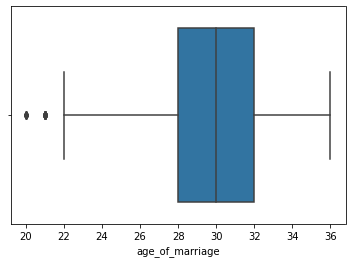

In [ ]:
import seaborn as sns
sns.boxplot(data10['age_of_marriage'])

In [ ]:
data10.head()

,gender,country,age_of_marriage,gender_random,total_height_in_cms,caste_random,religion_random,mother_tongue_random,person_by_profession,location_random
0,female,United Kingdom,21.0,female,155.2,others,Hindu,Telugu,missing,London
1,male,USA,32.0,male,158.2,Shwetamber,Jain,Gujarati,Doctor,Fairfax
2,male,India,32.0,male,158.2,Brahmin,Hindu,Hindi,Entrepreneurs,Begusarai
3,female,India,30.0,female,151.2,Thakur,Hindu,Hindi,Architect,Mumbai
4,male,India,30.0,male,156.2,Born Again,Christian,Malayalam,Sales Professional,Sulthan Bathery


,gender,country,age_of_marriage,gender_random,total_height_in_cms,caste_random,religion_random,mother_tongue_random,person_by_profession,location_random,country_ India,country_ USA,country_ Canada,country_ United Arab Emirates,country_ United Kingdom,country_ Australia,country_ Malaysia,country_ Pakistan,country_ New Zealand,country_ Kuwait
0,female,United Kingdom,21.0,female,155.2,others,Hindu,Telugu,missing,London,0,0,0,0,1,0,0,0,0,0
1,male,USA,32.0,male,158.2,Shwetamber,Jain,Gujarati,Doctor,Fairfax,0,1,0,0,0,0,0,0,0,0
2,male,India,32.0,male,158.2,Brahmin,Hindu,Hindi,Entrepreneurs,Begusarai,1,0,0,0,0,0,0,0,0,0
3,female,India,30.0,female,151.2,Thakur,Hindu,Hindi,Architect,Mumbai,1,0,0,0,0,0,0,0,0,0
4,male,India,30.0,male,156.2,Born Again,Christian,Malayalam,Sales Professional,Sulthan Bathery,1,0,0,0,0,0,0,0,0,0


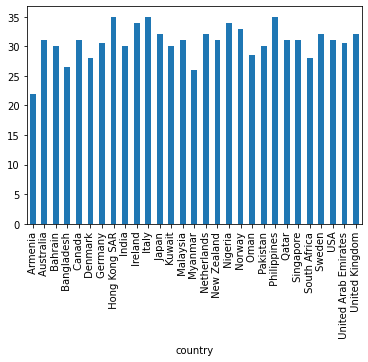

In [ ]:
data10['country'].nunique()
data10['country'].value_counts()

# top  7 rule
top_7_labels = [y for y in data10.country.value_counts().sort_values(ascending=False).head(10).index]
# get whole set of dummy variables, for all the categorical variables

def one_hot_encoding_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

one_hot_encoding_top_x(data10,'country',top_7_labels)
data10.head()
data10.groupby('country').age_of_marriage.median().plot.bar()
data10.head()

,gender,country,age_of_marriage,gender_random,total_height_in_cms,caste_random,religion_random,mother_tongue_random,person_by_profession,location_random,country_ India,country_ USA,country_ Canada,country_ United Arab Emirates,country_ United Kingdom,country_ Australia,country_ Malaysia,country_ Pakistan,country_ New Zealand,country_ Kuwait,male
0,female,United Kingdom,21.0,female,155.2,41,1,Telugu,missing,London,0,0,0,0,1,0,0,0,0,0,0
1,male,USA,32.0,male,158.2,34,2,Gujarati,Doctor,Fairfax,0,1,0,0,0,0,0,0,0,0,1
2,male,India,32.0,male,158.2,14,1,Hindi,Entrepreneurs,Begusarai,1,0,0,0,0,0,0,0,0,0,1
3,female,India,30.0,female,151.2,36,1,Hindi,Architect,Mumbai,1,0,0,0,0,0,0,0,0,0,0
4,male,India,30.0,male,156.2,13,0,Malayalam,Sales Professional,Sulthan Bathery,1,0,0,0,0,0,0,0,0,0,1


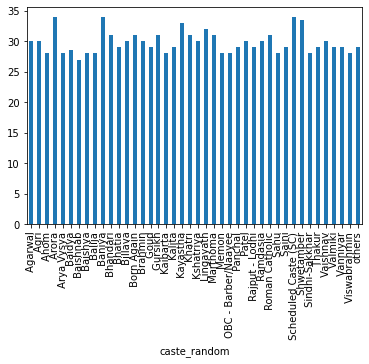

In [ ]:
data11=pd.get_dummies(data10['gender_random'],drop_first=True)
data11.head()
data12=pd.concat([data10,data11],axis=1)
data12.head()
data12.groupby('caste_random').age_of_marriage.median().plot.bar()
from sklearn.preprocessing import LabelEncoder
list=['caste_random','religion_random']
for feature in list:
    label=LabelEncoder()
    data12[feature]=label.fit_transform(data12[feature])


data12.head()

In [ ]:
data14=data12
data14.head()
data14.isnull().sum()
data14.head()
data15=data14.drop(['gender','gender_random'],axis=1)
data15.head()

,country,age_of_marriage,total_height_in_cms,caste_random,religion_random,mother_tongue_random,person_by_profession,location_random,country_ India,country_ USA,country_ Canada,country_ United Arab Emirates,country_ United Kingdom,country_ Australia,country_ Malaysia,country_ Pakistan,country_ New Zealand,country_ Kuwait,male
0,United Kingdom,21.0,155.2,41,1,Telugu,missing,London,0,0,0,0,1,0,0,0,0,0,0
1,USA,32.0,158.2,34,2,Gujarati,Doctor,Fairfax,0,1,0,0,0,0,0,0,0,0,1
2,India,32.0,158.2,14,1,Hindi,Entrepreneurs,Begusarai,1,0,0,0,0,0,0,0,0,0,1
3,India,30.0,151.2,36,1,Hindi,Architect,Mumbai,1,0,0,0,0,0,0,0,0,0,0
4,India,30.0,156.2,13,0,Malayalam,Sales Professional,Sulthan Bathery,1,0,0,0,0,0,0,0,0,0,1


In [ ]:

data17=data15


In [ ]:
data17['mother_tongue_random'].value_counts()
top_12_labels = [y for y in data17.mother_tongue_random.value_counts().sort_values(ascending=False).head(10).index]
# get whole set of dummy variables, for all the categorical variables
one_hot_encoding_top_x(data17,'mother_tongue_random',top_12_labels)
data17.head()
data18=data17.drop(['mother_tongue_random','country'],axis=1)
data18.head()

,age_of_marriage,total_height_in_cms,caste_random,religion_random,person_by_profession,location_random,country_ India,country_ USA,country_ Canada,country_ United Arab Emirates,country_ United Kingdom,country_ Australia,country_ Malaysia,country_ Pakistan,country_ New Zealand,country_ Kuwait,male,mother_tongue_random_Hindi,mother_tongue_random_Telugu,mother_tongue_random_Bengali,mother_tongue_random_Punjabi,mother_tongue_random_Marathi,mother_tongue_random_Gujarati,mother_tongue_random_Kannada,mother_tongue_random_Tamil,mother_tongue_random_Assamese,mother_tongue_random_Malayalam
0,21.0,155.2,41,1,missing,London,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,32.0,158.2,34,2,Doctor,Fairfax,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,32.0,158.2,14,1,Entrepreneurs,Begusarai,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,30.0,151.2,36,1,Architect,Mumbai,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,30.0,156.2,13,0,Sales Professional,Sulthan Bathery,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
data18.location_random.value_counts()
top_15_labels = [y for y in data18.location_random.value_counts().sort_values(ascending=False).head(20).index]
# get whole set of dummy variables, for all the categorical variables
one_hot_encoding_top_x(data18,'location_random',top_15_labels)
data18.head()
data18.shape

data18.person_by_profession.value_counts()
data18['person_by_profession']=data18['person_by_profession'].replace('missing','Not Specified')
data18.person_by_profession.value_counts()

data18['person_by_profession']=label.fit_transform(data18['person_by_profession'])
data18.head()
data18.isnull().sum()
data19=data18
data19.head()
data20=data19.drop(['location_random'],axis=1)

In [ ]:
# Rows with null values
is_nan=data20.isnull()
row_has_nan=is_nan.any(axis=1)
rows_with_nan=data20[row_has_nan]
rows_with_nan


,age_of_marriage,total_height_in_cms,caste_random,religion_random,person_by_profession,country_ India,country_ USA,country_ Canada,country_ United Arab Emirates,country_ United Kingdom,country_ Australia,country_ Malaysia,country_ Pakistan,country_ New Zealand,country_ Kuwait,male,mother_tongue_random_Hindi,mother_tongue_random_Telugu,mother_tongue_random_Bengali,mother_tongue_random_Punjabi,mother_tongue_random_Marathi,mother_tongue_random_Gujarati,mother_tongue_random_Kannada,mother_tongue_random_Tamil,mother_tongue_random_Assamese,mother_tongue_random_Malayalam,location_random_Mumbai,location_random_Bengaluru,location_random_Delhi,location_random_Hyderabad,location_random_Pune,location_random_Kolkata,location_random_Ahmedabad,location_random_Chennai,location_random_Guwahati,location_random_Gurgaon,location_random_Ludhiana,location_random_Chandigarh,location_random_Dubai,location_random_Indore,location_random_Punjab,location_random_Lucknow,location_random_New York- NY,location_random_Surat,location_random_Noida,location_random_Midnapore
290,NaN,155.2,34,1,29,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
305,NaN,151.2,3,1,16,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
432,NaN,157.2,36,1,57,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
580,NaN,156.2,41,3,70,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
723,NaN,156.2,41,1,58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
811,NaN,153.2,9,1,58,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
877,NaN,154.2,41,1,57,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
932,NaN,151.2,41,1,57,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1255,NaN,151.2,41,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1335,NaN,152.2,41,1,58,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data21=pd.concat([data20,rows_with_nan]).drop_duplicates(keep=False)
data21.reset_index()
data21.shape
data21.isnull().sum()
x=data21.drop(['age_of_marriage'],axis=1)
y=data21['age_of_marriage']
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.1)
x_train_scale=scale.fit(x_train)
x_test_scale=scale.transform(x_test)


Machine Learning modelling

1. Linear Regression

In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lin=LinearRegression()
mse=cross_val_score(lin,x,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-6.709879838860479


Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[1e-15,1e-5,0,5,10,40,50,95,100,1000]}
rid=Ridge()
ridge_mse=GridSearchCV(rid, parameters,scoring='neg_mean_squared_error',cv=5)
ridge_mse.fit(x,y)
print(ridge_mse.best_params_)
print(ridge_mse.best_score_)

{'alpha': 10}
-6.677611107917938


Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[1e-15,1e-5,0,1,5,10,40,50,95,100,1000]}
lasso=Lasso()
lasso_mse=GridSearchCV(lasso, parameters,scoring='neg_mean_squared_error',cv=5)
lasso_mse.fit(x,y)
print(lasso_mse.best_params_)
print(lasso_mse.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2833.2195398831145, tolerance: 1.5631992039801006
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1123.2026007252434, tolerance: 1.5813520398009964
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2543.988617212308, tolerance: 1.593186971655893
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2768.608

{'alpha': 1e-05}
-6.709577919608357


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


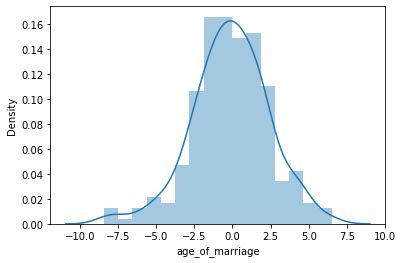

In [ ]:
prediction_lasso=lasso_mse.predict(x_test)
prediction_ridge=ridge_mse.predict(x_test)
import seaborn as sns

sns.distplot(y_test-prediction_lasso)

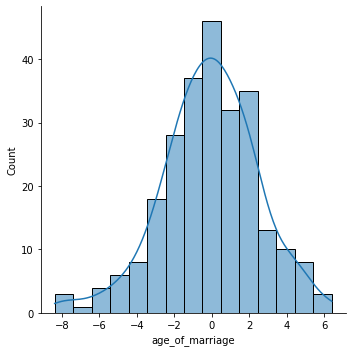

In [ ]:
sns.displot(y_test-prediction_ridge,kde=True)

Random Forest Ensemble Technique

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)
y_pred = reg_rf.predict(x_test)
reg_rf.score(x_test, y_test)

0.3620813146931434

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


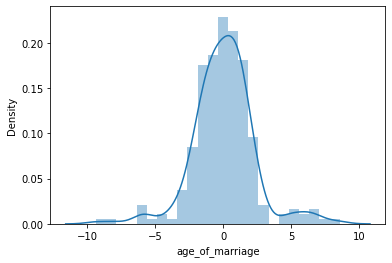

In [ ]:
import seaborn as nsns
sns.distplot(y_test-y_pred,kde=True)

Hyper Tuning Technique in Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_
rf_random.best_score_

-5.009623348538673

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


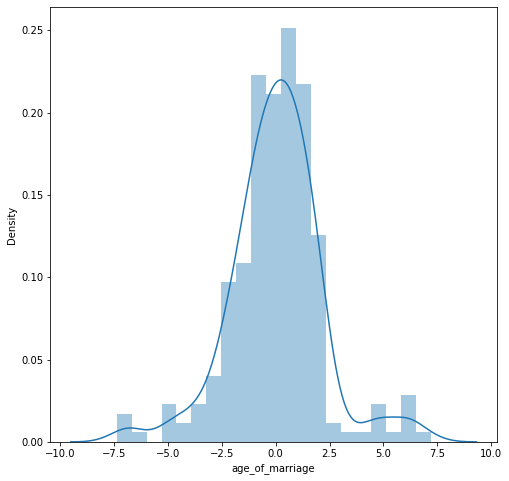

In [ ]:
prediction = rf_random.predict(x_test)
from matplotlib import pyplot as plt
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [ ]:
y_pred=rf_random.predict(x_test)

from sklearn.metrics import r2_score
acc=r2_score(y_test,y_pred)
print(acc)

0.4240617256451177


In [ ]:
import pickle
pickle.dump(rf_random,open('marriage_age_prediction.pkl','wb'))
